In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import matplotlib.patches as patches
warnings.filterwarnings("ignore")
from mplsoccer.pitch import Pitch
plt.style.use('ggplot')
from PIL import Image
from highlight_text import htext

In [2]:
with open('Arsenal_West Ham.json') as json_file:
    data = json.load(json_file)
    
event = []
minute = []
second = []
player = []
team = []
outcome = []
x = []
y = []
endX = []
endY = []

for each in data['events']:
    event.append(each['type']['displayName'])
    try:
        minute.append(each['minute'])
    except:
        minute.append('')
    try:
        second.append(each['second'])
    except:
        second.append('')
    try:
        player.append(each['playerId'])
    except:
        player.append('')
    try:
        team.append(each['teamId'])
    except:
        team.append('')
    try:
        endX.append(each['endX'])
        endY.append(each['endY'])
    except:
        endX.append('')
        endY.append('')
    outcome.append(each['outcomeType']['displayName'])
    x.append(each['x'])
    y.append(each['y'])

events = pd.DataFrame({'Event':event, 'Minute':minute, 'Second':second, 'Player':player, 'Team':team, 'Outcome':outcome, 'x':x, 'y':y,
                      'endX':endX, 'endY':endY})

In [3]:
events["Second"] = pd.to_numeric(events["Second"])
events["endX"] = pd.to_numeric(events["endX"])
events["endY"] = pd.to_numeric(events["endY"])

In [4]:
events.dtypes

Event       object
Minute       int64
Second     float64
Player      object
Team         int64
Outcome     object
x          float64
y          float64
endX       float64
endY       float64
dtype: object

In [5]:
events

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
0,Start,0,0.0,,13,Successful,0.0,0.0,NaN,NaN
1,Start,0,0.0,,29,Successful,0.0,0.0,NaN,NaN
2,Pass,0,1.0,297203,29,Successful,50.0,50.0,31.7,38.3
3,Pass,0,3.0,300359,29,Unsuccessful,35.0,39.7,69.6,80.2
4,Aerial,0,6.0,125211,13,Successful,31.0,20.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1633,End,94,25.0,,13,Successful,0.0,0.0,NaN,NaN
1634,End,0,0.0,,29,Successful,0.0,0.0,NaN,NaN
1635,End,0,0.0,,13,Successful,0.0,0.0,NaN,NaN
1636,FormationSet,0,0.0,,13,Successful,0.0,0.0,NaN,NaN


In [29]:
mask = (events['Minute'] > 23) & (events['Second'] < 26.0) & (events['Minute'] < 25)
laca = events.loc[mask].copy()
laca

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
439,Pass,24,0.0,29463,13,Successful,65.7,54.0,52.5,44.3
440,Pass,24,5.0,144890,13,Successful,58.0,41.2,47.0,59.4
441,Pass,24,8.0,334087,13,Successful,47.0,59.4,50.4,75.0
442,Pass,24,12.0,89401,13,Successful,54.6,75.0,67.0,78.8
443,Pass,24,15.0,367185,13,Successful,70.6,77.5,93.9,72.7
444,Pass,24,17.0,44120,13,Successful,94.6,71.5,92.3,49.1
445,Goal,24,19.0,73078,13,Successful,92.3,48.6,NaN,NaN


In [30]:
pass_df = laca['Event'] == 'Pass'
pss = laca[pass_df][:1]
pss

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
439,Pass,24,0.0,29463,13,Successful,65.7,54.0,52.5,44.3


In [31]:
pass_df = laca['Event'] == 'Pass'
pss1 = laca[pass_df][1:2]
pss1

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
440,Pass,24,5.0,144890,13,Successful,58.0,41.2,47.0,59.4


In [32]:
pass_df = laca['Event'] == 'Pass'
pss2 = laca[pass_df][2:3]
pss2

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
441,Pass,24,8.0,334087,13,Successful,47.0,59.4,50.4,75.0


In [33]:
pass_df = laca['Event'] == 'Pass'
pss3 = laca[pass_df][3:4]
pss3

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
442,Pass,24,12.0,89401,13,Successful,54.6,75.0,67.0,78.8


In [34]:
pass_df = laca['Event'] == 'Pass'
pss4 = laca[pass_df][4:5]
pss4

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
443,Pass,24,15.0,367185,13,Successful,70.6,77.5,93.9,72.7


In [35]:
pass_df = laca['Event'] == 'Pass'
pss5 = laca[pass_df][5:6]
pss5

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
444,Pass,24,17.0,44120,13,Successful,94.6,71.5,92.3,49.1


In [36]:
pass_df = laca['Event'] == 'Goal'
pss6 = laca[pass_df]
pss6

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
445,Goal,24,19.0,73078,13,Successful,92.3,48.6,NaN,NaN


In [39]:
with open('Wolves_Man City.json') as json_file:
    data = json.load(json_file)
    
event = []
minute = []
second = []
player = []
team = []
outcome = []
x = []
y = []
endX = []
endY = []

for each in data['events']:
    event.append(each['type']['displayName'])
    try:
        minute.append(each['minute'])
    except:
        minute.append('')
    try:
        second.append(each['second'])
    except:
        second.append('')
    try:
        player.append(each['playerId'])
    except:
        player.append('')
    try:
        team.append(each['teamId'])
    except:
        team.append('')
    try:
        endX.append(each['endX'])
        endY.append(each['endY'])
    except:
        endX.append('')
        endY.append('')
    outcome.append(each['outcomeType']['displayName'])
    x.append(each['x'])
    y.append(each['y'])

events = pd.DataFrame({'Event':event, 'Minute':minute, 'Second':second, 'Player':player, 'Team':team, 'Outcome':outcome, 'x':x, 'y':y,
                      'endX':endX, 'endY':endY})

In [40]:
events["Second"] = pd.to_numeric(events["Second"])
events["endX"] = pd.to_numeric(events["endX"])
events["endY"] = pd.to_numeric(events["endY"])

In [46]:
mask = ((events['Minute'] > 30) & (events['Second'] > 45)) & (events['Minute'] < 32)
foden = events.loc[mask].copy()
foden.Event.value_counts()

Pass    6
Goal    1
Name: Event, dtype: int64

In [56]:
pass_df = foden['Event'] == 'Pass'
pas = foden[pass_df][:1]
pas

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
560,Pass,31,47.0,19119,167,Successful,55.2,63.7,49.2,66.7


In [57]:
pass_df = foden['Event'] == 'Pass'
pas1 = foden[pass_df][1:2]
pas1

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
561,Pass,31,48.0,303139,167,Successful,49.0,65.4,66.2,56.4


In [58]:
pass_df = foden['Event'] == 'Pass'
pas2 = foden[pass_df][2:3]
pas2

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
562,Pass,31,50.0,331254,167,Successful,66.2,56.4,76.4,66.0


In [59]:
pass_df = foden['Event'] == 'Pass'
pas3 = foden[pass_df][3:4]
pas3

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
563,Pass,31,51.0,279379,167,Successful,76.4,66.0,72.7,67.2


In [60]:
pass_df = foden['Event'] == 'Pass'
pas4 = foden[pass_df][4:5]
pas4

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
564,Pass,31,52.0,73084,167,Successful,73.7,67.3,90.8,65.7


In [61]:
pass_df = foden['Event'] == 'Pass'
pas5 = foden[pass_df][5:6]
pas5

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
565,Pass,31,53.0,97692,167,Successful,90.8,65.7,89.3,53.3


In [62]:
pass_df = foden['Event'] == 'Goal'
pas6 = foden[pass_df]
pas6

,Event,Minute,Second,Player,Team,Outcome,x,y,endX,endY
566,Goal,31,54.0,331254,167,Successful,88.8,53.0,NaN,NaN


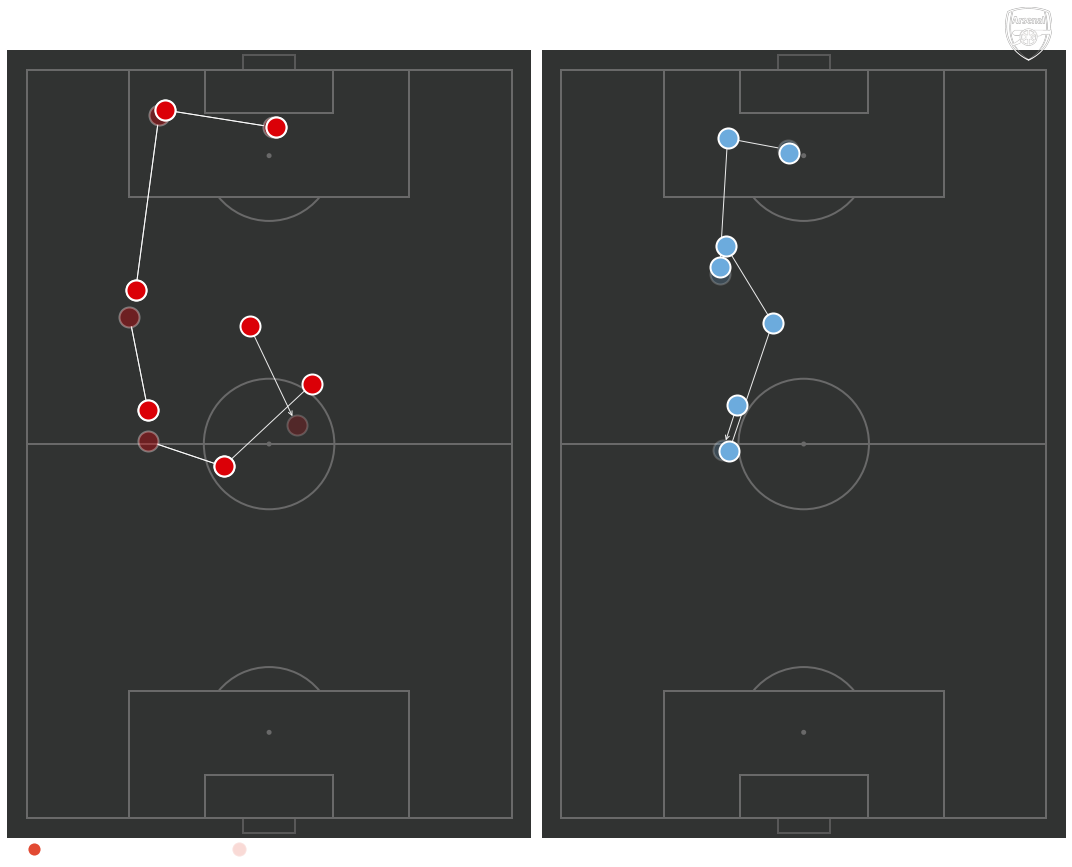

In [69]:
team = "Arsenal"
team2 = "Manchester City"
oppo1 = "West Ham"
oppo2 = "Wolves"
background = "#313332"
line = '#696969'
title_font = "BBC Reith Sans"
body_font = "BBC Reith Sans"
text_color = "w"
primary = "red"

pitch = Pitch(figsize=(15,15),orientation='vertical',view='full',layout=(1, 2),goal_type='box',pitch_type='opta',
              pitch_color=background, line_color=line,constrained_layout=False)

fig, ax = pitch.draw()

x = pss.x.values
y = pss.y.values
xE = pss.endX.values
yE = pss.endY.values
ax[0].scatter(y,x,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[0].scatter(yE,xE,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pss)):
    ax[0].annotate('', xy=(yE[i],xE[i]), xytext=(y[i],x[i]), zorder=7, arrowprops=dict(arrowstyle='->',lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))

x1 = pss1.x.values
y1 = pss1.y.values
xE1 = pss1.endX.values
yE1 = pss1.endY.values
ax[0].scatter(y1,x1,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[0].scatter(yE1,xE1,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pss1)):
    ax[0].annotate('', xy=(yE1[i],xE1[i]), xytext=(y1[i],x1[i]), zorder=7, arrowprops=dict(arrowstyle='-',lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))
    
x2 = pss2.x.values
y2 = pss2.y.values
xE2 = pss2.endX.values
yE2 = pss2.endY.values
ax[0].scatter(y2,x2,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[0].scatter(yE2,xE2,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pss2)):
    ax[0].annotate('', xy=(yE2[i],xE2[i]), xytext=(y2[i],x2[i]), zorder=7, arrowprops=dict(arrowstyle='-',lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))
    
x3 = pss3.x.values
y3 = pss3.y.values
xE3 = pss3.endX.values
yE3 = pss3.endY.values

ax[0].scatter(y3,x3,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[0].scatter(yE3,xE3,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)

for i in range(len(pss3)):
    ax[0].annotate('', xy=(yE3[i],xE3[i]), xytext=(y3[i],x3[i]), zorder=7, arrowprops=dict(arrowstyle='-',lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))    

x4 = pss4.x.values
y4 = pss4.y.values
xE4 = pss4.endX.values
yE4 = pss4.endY.values

ax[0].scatter(y4,x4,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[0].scatter(yE4,xE4,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)

for i in range(len(pss4)):
    ax[0].annotate('', xy=(yE4[i],xE4[i]), xytext=(y4[i],x4[i]), zorder=7, arrowprops=dict(arrowstyle='-',lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))        

x5 = pss5.x.values
y5 = pss5.y.values
xE5 = pss5.endX.values
yE5 = pss5.endY.values
ax[0].scatter(y5,x5,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[0].scatter(yE5,xE5,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pss5)):
    ax[0].annotate('', xy=(yE5[i],xE5[i]), xytext=(y5[i],x5[i]), zorder=7, arrowprops=dict(arrowstyle='-',lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))            

x6 = pss6.x.values
y6 = pss6.y.values
xE6 = pss6.endX.values
yE6 = pss6.endY.values
ax[0].scatter(y6,x6,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[0].scatter(yE6,xE6,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pss6)):
    ax[0].annotate('', xy=(yE6[i],xE6[i]), xytext=(y6[i],x6[i]), zorder=7, arrowprops=dict(arrowstyle='-',lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))            

x7 = pss7.x.values
y7 = pss7.y.values
xE7 = pss7.endX.values
yE7 = pss7.endY.values
ax[0].scatter(y7,x7,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[0].scatter(yE7,xE7,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pss7)):
    ax[0].annotate('', xy=(yE7[i],xE7[i]), xytext=(y7[i],x7[i]), zorder=7, arrowprops=dict(arrowstyle='-',lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))            

x8 = pss8.x.values
y8 = pss8.y.values
xE8 = pss8.endX.values
yE8 = pss8.endY.values
ax[0].scatter(y8,x8,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[0].scatter(yE8,xE8,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pss8)):
    ax[0].annotate('', xy=(yE8[i],xE8[i]), xytext=(y8[i],x8[i]), zorder=7, arrowprops=dict(arrowstyle='-',lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))            


x9 = pss9.x.values
y9 = pss9.y.values
xE9 = pss9.endX.values
yE9 = pss9.endY.values
ax[0].scatter(y9,x9,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[0].scatter(yE9,xE9,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pss9)):
    ax[0].annotate('', xy=(yE9[i],xE9[i]), xytext=(y9[i],x9[i]), zorder=7, arrowprops=dict(arrowstyle='-',lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))            

    
x10 = pss10.x.values
y10 = pss10.y.values
xE10 = pss10.endX.values
yE10 = pss10.endY.values
ax[0].scatter(y10,x10,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[0].scatter(yE10,xE10,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pss10)):
    ax[0].annotate('', xy=(yE10[i],xE10[i]), xytext=(y10[i],x10[i]), zorder=7, arrowprops=dict(arrowstyle='-',lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))            

    
x11 = pss11.x.values
y11 = pss11.y.values
xE11 = pss11.endX.values
yE11 = pss11.endY.values
ax[0].scatter(y11,x11,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[0].scatter(yE11,xE11,color="#DB0007",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pss11)):
    ax[0].annotate('', xy=(yE11[i],xE11[i]), xytext=(y11[i],x11[i]), zorder=7, arrowprops=dict(arrowstyle='-',lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))            

    
# ax[0].plot([2.5,4],[15.5,20],color=text_color,zorder=5, alpha=1, ls="--",lw=1, dashes=(4, 4))
# ax[0].plot([3.5,16.5],[46.5,62],color=text_color,zorder=5, alpha=1, ls="--",lw=1, dashes=(4, 4))
# ax[0].plot([71,83],[82.5,77],color=text_color,zorder=5, alpha=1, ls="--",lw=1, dashes=(4, 4))
# ax[0].annotate('', xy=([46,102]), xytext=([71.77,81.9]), zorder=7, arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=0.4",lw=1,color=text_color))


x = pas.x.values
y = pas.y.values
xE = pas.endX.values
yE = pas.endY.values
ax[1].scatter(y,x,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[1].scatter(yE,xE,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pas)):
    ax[1].annotate('', xy=(yE[i],xE[i]), xytext=(y[i],x[i]), zorder=7, arrowprops=dict(arrowstyle='->', lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))
    
x1 = pas1.x.values
y1 = pas1.y.values
xE1 = pas1.endX.values
yE1 = pas1.endY.values
ax[1].scatter(y1,x1,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[1].scatter(yE1,xE1,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pas1)):
    ax[1].annotate('', xy=(yE1[i],xE1[i]), xytext=(y1[i],x1[i]), zorder=7, arrowprops=dict(arrowstyle='-', lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))
    
x2 = pas2.x.values
y2 = pas2.y.values
xE2 = pas2.endX.values
yE2 = pas2.endY.values
ax[1].scatter(y2,x2,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[1].scatter(yE2,xE2,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pas2)):
    ax[1].annotate('', xy=(yE2[i],xE2[i]), xytext=(y2[i],x2[i]), zorder=7, arrowprops=dict(arrowstyle='-', lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))    

x3 = pas3.x.values
y3 = pas3.y.values
xE3 = pas3.endX.values
yE3 = pas3.endY.values
ax[1].scatter(y3,x3,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[1].scatter(yE3,xE3,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pas3)):
    ax[1].annotate('', xy=(yE3[i],xE3[i]), xytext=(y3[i],x3[i]), zorder=7, arrowprops=dict(arrowstyle='-', lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))    
    
x4 = pas4.x.values
y4 = pas4.y.values
xE4 = pas4.endX.values
yE4 = pas4.endY.values
ax[1].scatter(y4,x4,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[1].scatter(yE4,xE4,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pas4)):
    ax[1].annotate('', xy=(yE4[i],xE4[i]), xytext=(y4[i],x4[i]), zorder=7, arrowprops=dict(arrowstyle='-', lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))        

x5 = pas5.x.values
y5 = pas5.y.values
xE5 = pas5.endX.values
yE5 = pas5.endY.values
ax[1].scatter(y5,x5,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[1].scatter(yE5,xE5,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pas5)):
    ax[1].annotate('', xy=(yE5[i],xE5[i]), xytext=(y5[i],x5[i]), zorder=7, arrowprops=dict(arrowstyle='-', lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))        

x6 = pas6.x.values
y6 = pas6.y.values
xE6 = pas6.endX.values
yE6 = pas6.endY.values
ax[1].scatter(y6,x6,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=1)
ax[1].scatter(yE6,xE6,color="#6CABDD",edgecolors=text_color, s=400, linewidth=2, zorder=12, alpha=0.2)
for i in range(len(pas6)):
    ax[1].annotate('', xy=(yE6[i],xE6[i]), xytext=(y6[i],x6[i]), zorder=7, arrowprops=dict(arrowstyle='-', lw=1,color=text_color,alpha=0.9,shrinkA=7, shrinkB=10))        


# ax[1].annotate('', xy=([46,102]), xytext=([62,87.5]), zorder=7, arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=0.4",lw=1,color=text_color))
# ax[1].plot([65,76],[86.5,80.5],color=text_color,zorder=5, alpha=1, ls="--",lw=1, dashes=(4, 4))
    
s = "{} vs. {}"
htext.fig_htext(s.format(team,oppo1),0.03,0.88,highlight_colors=[primary], highlight_weights=["bold"],string_weight="bold",fontsize=24, fontfamily=title_font,color=text_color)
fig.text(0.03,0.868,"Community Shield | 29 Aug 2020",fontweight="regular", fontsize=14,fontfamily=title_font, color=text_color)

htext.fig_htext(s.format(oppo2,team2),0.53,0.88,highlight_colors=[primary], highlight_weights=["bold"],string_weight="bold",fontsize=24, fontfamily=title_font,color=text_color)
fig.text(0.53,0.868,"English Premier League | 12 Sep 2020",fontweight="regular", fontsize=14,fontfamily=title_font, color=text_color)

ax2 = fig.add_axes([0.93,0.855,0.05,0.05]) # badge
ax2.axis("off")
img = Image.open('./Arsenal.png')
ax2.imshow(img)

ax3 = fig.add_axes([0.01,0.115,0.05,0.02])
ax3.axis("off")
ax3.scatter([0.2],[0.05],edgecolors=text_color, s=200, linewidth=2, zorder=12, alpha=1)
fig.text(0.05, 0.12, "player",fontsize=13, fontfamily=body_font, color=text_color)

ax4 = fig.add_axes([0.2,0.115,0.05,0.02])
ax4.axis("off")
ax4.scatter([0.2],[0.05],edgecolors=text_color, s=200, linewidth=2, zorder=12, alpha=0.2)
fig.text(0.24, 0.12, "start of carry",fontsize=13, fontfamily=body_font, color=text_color)

ax5 = fig.add_axes([0.4,0.115,0.05,0.02])
ax5.axis("off")
ax5.plot([0.5,0],[0.5,0.5],color=text_color,zorder=5, alpha=1, ls="--",lw=1,dashes=(4, 4))
fig.text(0.455, 0.12, "carry",fontsize=13, fontfamily=body_font, color=text_color)

ax6 = fig.add_axes([0.6,0.115,0.05,0.02])
ax6.axis("off")
ax6.plot([0.5,0],[0.5,0.5],color=text_color,zorder=5, alpha=1, ls="-",lw=1)
fig.text(0.652, 0.12, "pass",fontsize=13, fontfamily=body_font, color=text_color)

fig.text(0.9, 0.12, "@jonollington",fontsize=14, fontfamily=body_font, color=text_color)

plt.rcParams['axes.facecolor']=background
plt.rcParams['savefig.facecolor']=background
plt.savefig("city",bbox_inches="tight",dpi=200);